In [18]:
""" Inspired by https://www.youtube.com/watch?v=wc-FxNENg9U """
import matplotlib.pyplot as plt
import torch
import numpy as np
from copy import deepcopy
from tqdm import tqdm
from game import *
from Agent import *

In [20]:
my_seed = 2754

my_gamma = 0.95
my_initial_exploration_rate = 1.0
my_learning_rate = 0.001
my_input_dims = [4]
my_batch_size = 64
my_nr_actions = 4
my_exploration_rate_min = 0.01
my_exploration_decay_rate = 0.0001

agent = Agent(gamma=my_gamma,exploration_rate=my_initial_exploration_rate,
              lr=my_learning_rate, input_dims=my_input_dims,
              batch_size=my_batch_size,nr_actions=my_nr_actions,
              max_mem_size=6400, exploration_rate_min=my_exploration_rate_min,
              exploration_decay_rate=my_exploration_decay_rate)

In [21]:
my_nr_games = 1000
max_steps = 100000

game_scores = []
for game in tqdm(range(my_nr_games)):
    game_env = SimpleSnakeApp(seed=my_seed + game,  # Try both constant seed and varying seed for each episode
                              display_gameplay=False)
    current_game_score = 0
    done = False
    observation = game_env.get_state()
    for time_step in range(max_steps):
        action = agent.choose_action(observation)
        current_reward, running, new_observation = game_env.step(action)
        current_game_score += current_reward
        agent.store_transition(state=observation,action=action,
                               reward=current_reward, new_state=new_observation,
                               done_flag=running)
        agent.learn()
        observation = new_observation
        if not running:
            break
    game_scores.append(current_game_score)

100%|██████████| 1000/1000 [00:09<00:00, 105.04it/s]


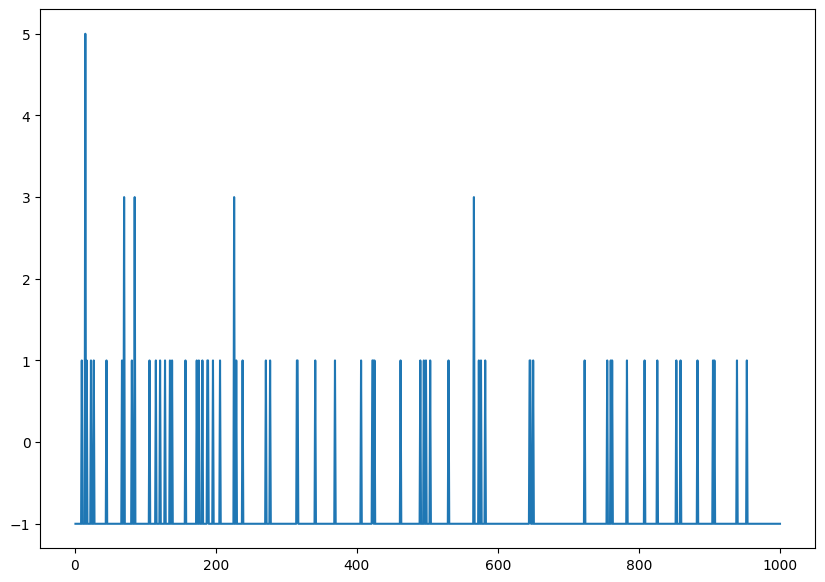

In [22]:
batch_size = 1
avg_rewards = []
for batch in range(int(my_nr_games/batch_size)):
    avg_rewards.append(np.mean(game_scores[batch_size * batch : batch_size * (batch + 1)]))

# Plot reward of each 'episode'
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(list(range(1, len(avg_rewards)+1)), avg_rewards)
plt.show()